In [139]:
import os
import numpy as np
import pandas as pd
from sklearn import preprocessing

import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 50)
%matplotlib inline
plt.style.use('ggplot')

In [140]:
data = pd.read_csv('EPSEXP.csv')
data = data.dropna()
print(data.shape)
print(list(data.columns))

(498, 10)
['NAME', 'DATEPUBLIC', 'MARKETVAL', 'TRADEVOLUME', 'BETAESTIMATE', 'UP/DOWN10DB4EARN', 'OVER/UNDERPERFORMED', '10DAYSOUT', '20DAYSOUT', '30DAYSOUT']


In [141]:
data.columns.to_series().groupby(data.dtypes).groups

{dtype('int64'): Index(['TRADEVOLUME', 'BETAESTIMATE'], dtype='object'),
 dtype('O'): Index(['NAME', 'DATEPUBLIC', 'MARKETVAL', 'UP/DOWN10DB4EARN',
        'OVER/UNDERPERFORMED', '10DAYSOUT', '20DAYSOUT', '30DAYSOUT'],
       dtype='object')}

In [142]:
df=data[['NAME','DATEPUBLIC','MARKETVAL','TRADEVOLUME','BETAESTIMATE','UP/DOWN10DB4EARN','OVER/UNDERPERFORMED','10DAYSOUT']]

In [143]:
import datetime

In [144]:
todaydate = datetime.datetime.today()

In [145]:
df['YEARSPUBLIC'] = (todaydate - pd.to_datetime(df['DATEPUBLIC'])).astype('<m8[Y]')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [146]:
df.dtypes

NAME                    object
DATEPUBLIC              object
MARKETVAL               object
TRADEVOLUME              int64
BETAESTIMATE             int64
UP/DOWN10DB4EARN        object
OVER/UNDERPERFORMED     object
10DAYSOUT               object
YEARSPUBLIC            float64
dtype: object

In [147]:
def convertMARKETVAL(valueInString):
    return float(valueInString.replace(",",""))

In [148]:
df['MARKETVAL'] = df['MARKETVAL'].apply(convertMARKETVAL)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [149]:
df['OVER/UNDERPERFORMED'] = df['OVER/UNDERPERFORMED'].apply(lambda x: np.nan if x in ['-'] else x[:-1]).astype(float)/100

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [150]:
df['UP/DOWN10DB4EARN'] = df['UP/DOWN10DB4EARN'].apply(lambda x: np.nan if x in ['-'] else x[:-1]).astype(float)/100

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [151]:
df['10DAYSOUT'] = df['10DAYSOUT'].apply(lambda x: np.nan if x in ['-'] else x[:-1]).astype(float)/100

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [152]:
df.describe()

,MARKETVAL,TRADEVOLUME,BETAESTIMATE,UP/DOWN10DB4EARN,OVER/UNDERPERFORMED,10DAYSOUT,YEARSPUBLIC
count,4.980000e+02,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,4.784591e+04,0.734940,1.287149,-0.006624,-0.475538,-0.041394,27.088353
std,1.083561e+05,0.441809,0.804837,0.059695,12.562939,0.101485,9.888118
min,1.906500e+03,0.000000,0.000000,-0.379900,-279.809800,-0.690500,0.000000
25%,1.014933e+04,0.000000,1.000000,-0.027150,-0.002300,-0.080650,21.000000
50%,1.912455e+04,1.000000,2.000000,0.002100,0.031450,-0.016650,33.000000
75%,4.444295e+04,1.000000,2.000000,0.028275,0.089150,0.018575,35.000000
max,1.216252e+06,1.000000,2.000000,0.147500,10.039400,0.204400,35.000000


In [153]:
criteria = [df['YEARSPUBLIC']<=10, df['YEARSPUBLIC'].between(10,20,inclusive=False), df['YEARSPUBLIC']>=20]
values = [1,2,3]
df['AGECAT'] = np.select(criteria,values)

In [154]:
criteria = [df['MARKETVAL']<=10222,df['MARKETVAL'].between(10222,43868,inclusive=False),df['MARKETVAL']>=43868.07]
values = [1,2,3]
df['MRKTVCAT'] = np.select(criteria,values)

In [155]:
criteria = [df['OVER/UNDERPERFORMED']<= 0, df['OVER/UNDERPERFORMED']>=.0]
values = [0,1]
df['ExceedForecast'] = np.select(criteria,values)

In [156]:
criteria = [df['UP/DOWN10DB4EARN']<= -0.2799,df['UP/DOWN10DB4EARN'].between(-0.2799,0,inclusive=False),df['UP/DOWN10DB4EARN']>=0]
values = [-1,0,1]
df['UP/DOWN10DB4EARN'] = np.select(criteria,values)

In [157]:
criteria = [df['10DAYSOUT']<=0, df['10DAYSOUT']>=0]
values = [0,1]
df['y'] = np.select(criteria,values)

In [158]:
df.dtypes

NAME                    object
DATEPUBLIC              object
MARKETVAL              float64
TRADEVOLUME              int64
BETAESTIMATE             int64
UP/DOWN10DB4EARN         int64
OVER/UNDERPERFORMED    float64
10DAYSOUT              float64
YEARSPUBLIC            float64
AGECAT                   int64
MRKTVCAT                 int64
ExceedForecast           int64
y                        int64
dtype: object

In [159]:
df.head(5)

,NAME,DATEPUBLIC,MARKETVAL,TRADEVOLUME,BETAESTIMATE,UP/DOWN10DB4EARN,OVER/UNDERPERFORMED,10DAYSOUT,YEARSPUBLIC,AGECAT,MRKTVCAT,ExceedForecast,y
0,3M Company,11/05/1984,81551.0,0,0,0,-0.0762,-0.0189,35.0,3,3,0,0
1,A. O. Smith Corporation,11/05/1984,6721.6,1,2,0,-0.0581,-0.0325,35.0,3,1,0,0
2,Abbott Laboratories,11/05/1984,143984.3,1,0,1,0.0041,-0.0250,35.0,3,3,1,0
3,"AbbVie, Inc.",12/10/2012,126275.6,1,0,1,0.0080,0.0092,7.0,1,3,1,1
4,"ABIOMED, Inc.",7/29/1987,6435.9,1,2,1,0.3947,-0.1493,32.0,3,1,1,0


In [160]:
df['y'].value_counts()

0    312
1    186
Name: y, dtype: int64

In [161]:
count_no_sub = len(df[df['y']==0])
count_sub = len(df[df['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of Companies that Lost SV", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of companies that gained SV", pct_of_sub*100)

percentage of Companies that Lost SV 62.65060240963856
percentage of companies that gained SV 37.34939759036144


Text(0, 0.5, 'Frequency of Positive Drift')

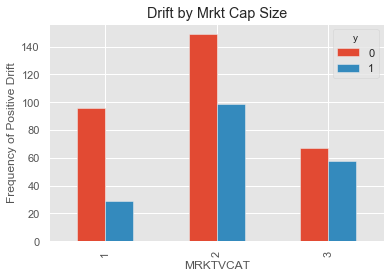

In [162]:
%matplotlib inline
pd.crosstab(df.MRKTVCAT,df.y).plot(kind='bar')
plt.title('Drift by Mrkt Cap Size')
plt.xlabel('MRKTVCAT')
plt.ylabel('Frequency of Positive Drift')

Text(0, 0.5, 'Frequency of Positive Drift')

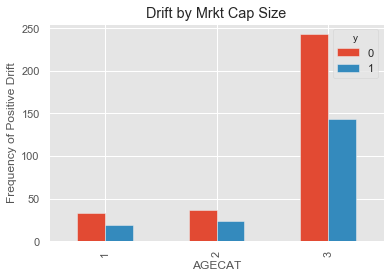

In [163]:
%matplotlib inline
pd.crosstab(df.AGECAT,df.y).plot(kind='bar')
plt.title('Drift by Mrkt Cap Size')
plt.xlabel('AGECAT')
plt.ylabel('Frequency of Positive Drift')

Text(0, 0.5, 'Frequency of Drift')

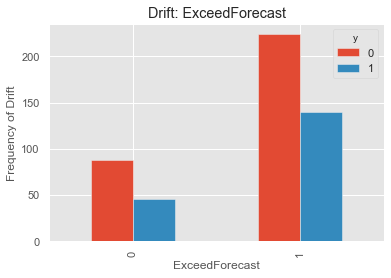

In [164]:
%matplotlib inline
pd.crosstab(df.ExceedForecast,df.y).plot(kind='bar')
plt.title('Drift: ExceedForecast')
plt.xlabel('ExceedForecast')
plt.ylabel('Frequency of Drift')

In [165]:
df = df[['NAME','MRKTVCAT','TRADEVOLUME','BETAESTIMATE','UP/DOWN10DB4EARN','ExceedForecast','y']]

In [166]:
df

,NAME,MRKTVCAT,TRADEVOLUME,BETAESTIMATE,UP/DOWN10DB4EARN,ExceedForecast,y
0,3M Company,3,0,0,0,0,0
1,A. O. Smith Corporation,1,1,2,0,0,0
2,Abbott Laboratories,3,1,0,1,1,0
3,"AbbVie, Inc.",3,1,0,1,1,1
4,"ABIOMED, Inc.",1,1,2,1,1,0
...,...,...,...,...,...,...,...
495,"Yum! Brands, Inc.",2,1,1,1,0,0
496,Zebra Technologies Corporation Class A,1,1,2,1,0,0
497,"Zimmer Biomet Holdings, Inc.",2,1,1,0,1,1
498,"Zions Bancorporation, N.A.",1,1,2,0,0,1


In [181]:
cols=['MRKTVCAT','TRADEVOLUME', 'BETAESTIMATE','UP/DOWN10DB4EARN'] 
X=df[cols]
y=df['ExceedForecast']

In [182]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.573255
         Iterations 5
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.016   
Dependent Variable: ExceedForecast   AIC:              578.9623
Date:               2020-04-08 00:18 BIC:              595.8047
No. Observations:   498              Log-Likelihood:   -285.48 
Df Model:           3                LL-Null:          -290.00 
Df Residuals:       494              LLR p-value:      0.028681
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     5.0000                                     
---------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
---------------------------------------------------------------
MRKTVCAT          0.5000   0.0993  5.0379 0.0000  0.3055 0.6945
TRADEVOLUME      -0.0766   0.2274 -0.3367 0.7363 -0.5223 0.3692
BETAESTIMATE      0.0422   

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [184]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.73


In [185]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.73      1.00      0.84        91

    accuracy                           0.73       125
   macro avg       0.36      0.50      0.42       125
weighted avg       0.53      0.73      0.61       125



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [186]:
df = df[['MRKTVCAT','TRADEVOLUME','BETAESTIMATE','UP/DOWN10DB4EARN','ExceedForecast']]

In [188]:
X = df.loc[:, df.columns != 'ExceedForecast']
y = df.loc[:, df.columns == 'ExceedForecast']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  512
Number of no subscription in oversampled data 0
Number of subscription 0
Proportion of no subscription data in oversampled data is  0.0
Proportion of subscription data in oversampled data is  0.0


In [189]:
X_train.shape

(348, 4)

In [190]:
os_data_X.shape

(512, 4)

In [191]:
os_data_y.shape

(512, 1)

In [192]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
logreg2 = LogisticRegression()
logreg2.fit(os_data_X, os_data_y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [193]:
y_pred = logreg2.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg2.score(X_test, y_test)))

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.